In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [3]:
start = datetime.datetime(1982,12, 31)
end = datetime.datetime(2023, 12, 31)

In [4]:
SP500 = yf.download('^GSPC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
SP500.to_csv('SP500.csv')

In [6]:
#SP500 = pd.read_csv('SP500.csv')

In [7]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000


In [8]:
SP500['Adj Close'].head()

Date
1982-12-31    140.639999
1983-01-03    138.339996
1983-01-04    141.360001
1983-01-05    141.960007
1983-01-06    145.270004
Name: Adj Close, dtype: float64

In [9]:
SP500['Adj Close'].tail()

Date
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Adj Close, dtype: float64

Calcoliamo i rendimenti semplici lordi e netti e logaritmici.<br> 
Ciò che fa è prendere il prezzo di chiusura aggiustato e dividerlo per il prezzo di chiusura shiftato di uno (in questo modo è come se prendesse il prezzo di chisura aggiustato del giorno x / il prezzo di chiusura aggiustato del giorno x - 1). <br>
L'idea è quella che abbiamo anche visto a lezione: ho una serie di prezzi e divido il prezzo al tempo t con il prezzo al tempo t - 1 per calcolare il ritorno.

In [10]:
SP500['RS_Lordo'] = SP500['Adj Close']/SP500['Adj Close'].shift(1) # ritorno lordo

In [11]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo
Date,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316


Il ritorno netto è dato da ritorno lordo - 1. <br>
Il metodo pct_change() viene utilizzato per calcolare la percentuale di cambiamento tra i valori consecutivi in una Serie o in un DataFrame lungo un determinato asse: nel nostro caso, quindi, corrisponde al ritorno netto.

In [12]:
SP500['RS_Netto'] = SP500['Adj Close'].pct_change(1)

In [13]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto
Date,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316


Come abbiamo detto a lezione, a volte lavorare con il ritorno lordo logaritmico è più comodo: ricordiamo infatti che il ritorno lordo su un periodo (t - 1, t), formato da n sottoperiodi, è dato dalla produttoria del ritorno lordo di ciascun sottoperiodo. <br>
 La produttoria è difficilmente manipolabile, per cui spesso viene utilizzato il ritorno lordo logaritmico per fare delle operazioni.<br>
 Il ritorno lordo logaritmico su un periodo (t - 1, t), formato da n sottoperiodi, è infatti dato dalla somma del ritorno lordo logaritmici di ciascun sottoperiodo.
 
__PER CAPIRE__: il logaritmo viene introdotto per trasformare la produttoria in una sommatoria, con tutti i vantaggi del caso.

In [14]:
SP500['RL'] = np.log(SP500['Adj Close']/SP500['Adj Close'].shift(1))

In [15]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL
Date,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049


Qual é il collegamento fra rendimenti semplici e logaritmici? <br>
Aumentando la frequenza di capitalizzazione (numero di sottoperiodi) il rendimento composto semplice si avvicina a quello logaritmico.


In [16]:
f = [1, 2, 4, 12, 52, 365, 730, 1460]
r = 0.10
tassi = []

for i in f:
    tasso = (1+r/i)**i - 1
    tassi.append(tasso)

for i in tassi:
    print(round(i, 7))

print(round(np.exp(r)-1, 7))

0.1
0.1025
0.1038129
0.1047131
0.1050648
0.1051558
0.1051633
0.1051671
0.1051709


Differenze fra rendimenti semplici e logaritmici:
- Rendimenti semplici non si sommano nel tempo, logaritmici sì
- Rendimenti semplici si sommano nel portafoglio, logaritmici no
- Rendimenti semplici sono sensibili alla frequenza di calcolo, logaritmici no


Il prodotto dei rendimenti lordi è il valore capitalizzato dell'investimento di un'unità al rendimento della serie.

__PER CAPIRE__: sta frase serve a dire che se prendiamo i rendimenti lordi semplici e li moltiplichiamo tra loro otteniamo il rendimento lordo su tutto il periodo. <br>
Questo lavoro viene fatto su ciascun elemento della serie tramite la funzione cumprod(); lui vuole fare questo lavoro per ciacuna cella.

__PER CAPIRE__: in RS_Lordo c'è il ritorno lordo per ogni giorno rispetto al giorno precedente, in Cum c'è il ritorno lordo per ogni giorno rispetto al giorno iniziale.

In [17]:
SP500['Cum'] = np.cumprod(SP500['RS_Lordo'])

In [18]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-03,140.649994,141.330002,138.199997,138.339996,138.339996,59080000,0.983646,-0.016354,-0.016489,0.983646
1983-01-04,138.330002,141.360001,138.080002,141.360001,141.360001,75530000,1.021830,0.021830,0.021595,1.005119
1983-01-05,141.350006,142.600006,141.149994,141.960007,141.960007,95390000,1.004245,0.004245,0.004236,1.009386
1983-01-06,142.009995,145.770004,142.009995,145.270004,145.270004,129410000,1.023316,0.023316,0.023049,1.032921


In [19]:
SP500.tail()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,1.001660,0.001660,0.001659,33.807095
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,1.004232,0.004232,0.004223,33.950157
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,1.001430,0.001430,0.001429,33.998721
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000,1.000370,0.000370,0.000370,34.011306
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000,0.997174,-0.002826,-0.002830,33.915174


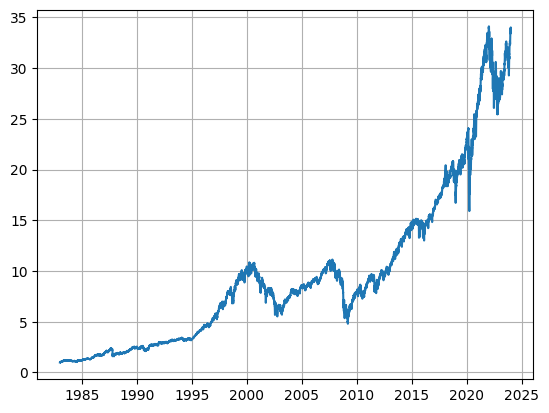

In [20]:
plt.plot(SP500['Cum'])
plt.grid()

In [21]:
srl = (SP500.iloc[1:6, ].loc[ : , 'RL'].sum()) # somma dei ritorni logaritmici

In [22]:
np.e**srl # annullo il logaritmo (operazione inversa)

1.0322809535397865

In [23]:
SP500.iloc[1:6, ].loc[ : , 'RS_Lordo'].prod() # prodotto dei ritorni semplici

1.0322809535397863

In [24]:
SP500.iloc[5].loc['Cum'] # ritorno cumulativo

1.0322809535397863

__NB__: facendo la somma dei ritorni logaritmici, il prodotto dei ritorni semplici o il calcolo del ritorno cumulativo si ottiene sempre lo stesso valore (cioè il ritorno lordo composto)

In [25]:
SP500['Adj Close'].iloc[-1] / SP500['Adj Close'].iloc[0]

33.915174195287115

Calcoliamo il rendimento composto annuo dell'investimento sul periodo considerato

In [26]:
delta = end - start
delta.days

14975

In [27]:
t = delta/datetime.timedelta(days=1)

In [28]:
t

14975.0

In [29]:
type(t)

float

In [30]:
t/365

41.02739726027397

In [31]:
SP500_cagr = (SP500['Adj Close'].iloc[-1]/SP500['Adj Close'].iloc[0])**(365/t) - 1 # se metti indici negativi parte dalla coda
SP500_cagr # ritorno annuale lordo composto (fa la media geometrica del ritorno lordo composto dei 41 anni), vedi appunti pagina 29

0.08968697093262445

In [32]:
SP500['Cum'].iloc[-1]**(1/41) - 1

0.08974951447728596

Per avere una serie più maneggevole passiamo da una frequenza giornaliera a una frequenza mensile: utilizzamo quindi il metodo "groupby" e la frequenza mensile ('ME').<br>
Poichè vogliamo il valore di fine mese specifichiamo ".last()".

__NB__: nelle analisi di serie storiche utilizzare sempre valori osservati (giorni, fine settimana, fine mese eccetera), __mai__ medie (`mean()`) perché creiamo valori che non corrispondono a veri investimenti e riduciamo artificiosamente la volatilità.

In [33]:
SP500_m = SP500.groupby(pd.Grouper(freq='ME')).last() # aggregazione mensile, seleziona solo il valore dell'ultimo giorno del mese
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.005467,0.005467,0.005452,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,0.988781,-0.011219,-0.011283,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,0.997197,-0.002803,-0.002807,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.009083,0.009083,0.009042,1.169155


In [34]:
SP500_m['RS_Lordo'] = SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1)

In [35]:
SP500_m['RS_Netto'] = SP500_m['Adj Close'].pct_change(1)

In [36]:
SP500_m['RL'] = np.log(SP500_m['Adj Close']/SP500_m['Adj Close'].shift(1))

In [37]:
SP500_m.head()

,Open,High,Low,Close,Adj Close,Volume,RS_Lordo,RS_Netto,RL,Cum
Date,,,,,,,,,,
1982-12-31,140.339996,140.779999,140.270004,140.639999,140.639999,42110000,NaN,NaN,NaN,NaN
1983-01-31,144.509995,145.300003,143.929993,145.300003,145.300003,67140000,1.033134,0.033134,0.032597,1.033134
1983-02-28,149.740005,149.740005,147.809998,148.059998,148.059998,83750000,1.018995,0.018995,0.018817,1.052759
1983-03-31,153.410004,155.020004,152.860001,152.960007,152.960007,100570000,1.033095,0.033095,0.032559,1.087600
1983-04-30,162.970001,164.429993,162.720001,164.429993,164.429993,105750000,1.074987,0.074987,0.072308,1.169155


In [38]:
SP500_m['Adj Close'].iloc[-1]/SP500_m['Adj Close'].iloc[0]

33.915174195287115

Prima differenza: ritorni semplici non si sommano nel tempo, logaritmici sì. <br>
Se prendiamo il ritorno semplice medio e lo moltiplichiamo per il numero di periodi (41 anni per 12 mesi = 492) otteniamo un valore finale molto più elevato di quello corretto.
Se facciamo la stessa cosa con il rendimento logaritmico medio otteniamo il valore corretto.

In [39]:
RS_Netto_m = np.mean(SP500_m['RS_Netto'])
RS_Netto_m

0.008156658344535056

In [40]:
RL_m = np.mean(SP500_m['RL'])
RL_m

0.0071623222166996535

In [41]:
(1+RS_Netto_m)**(41*12)

54.423591010684014

In [42]:
np.exp(RL_m*41*12)

33.91517419528715

__NB__: possiamo passare da rendimenti semplici a rendimenti logaritmici grazie a un risultato ricavato dal cosiddetto Lemma di Ito, per il quale RL = RS - 0.5*Var(RS)

In [43]:
RS_Netto_var = np.var(SP500_m['RS_Netto'])

In [44]:
RS_Netto_m - 0.5*RS_Netto_var

0.0072030306685217935

### Rendimenti e portafogli

La media ponderata dei rendimenti semplici delle componenti di un portafoglio è _uguale_ al rendimento del portafoglio

In [45]:
weights = np.array([0.2,0.5,0.3])

In [46]:
inizio = np.array([100, 100, 100])

In [47]:
port_inizio = np.sum(weights*inizio)
port_inizio

100.0

In [48]:
fine = np.array([102,105,115])

In [49]:
ret_s = fine/inizio - 1
ret_s

array([0.02, 0.05, 0.15])

In [50]:
port_fine_s = np.sum(weights*fine)
port_fine_s

107.4

In [51]:
ret_port = np.sum(weights*ret_s)
ret_port

0.074

In [52]:
port_fine_s_check = port_inizio * (1+ret_port)
port_fine_s_check

107.4

In [53]:
port_fine_s == port_fine_s_check # la somma pesata dei rendimenti dei singoli titoli è uguale al prodotto tra il valore iniziale del portafoglio e il suo ritorno lordo

True

La media ponderata dei rendimenti logaritmici delle componenti di un portafoglio è invece _diversa_ dal rendimento logaritmico del portafoglio

In [54]:
ret_l = np.log(fine/inizio)
ret_l

array([0.01980263, 0.04879016, 0.13976194])

In [55]:
ret_pond_log = np.sum(ret_l*weights)
ret_pond_log

0.07028419025649955

In [56]:
ret_port_log = np.log(107.4/100)
ret_port_log

0.071389996086673

In [57]:
ret_port_log == ret_pond_log

False

#### Valori finali di un percorso di accumulazione e distribuzione log normale


In [58]:
ret = RS_Netto_m
ret

0.008156658344535056

In [59]:
std = np.sqrt(RS_Netto_var)
std

0.04367213473173167

Creaimo 10000 percorsi di investimento mensili per 10 anni utilizzando media e deviazione standard storiche del S&P500 con un metodo chiamato simulazione MonteCarlo

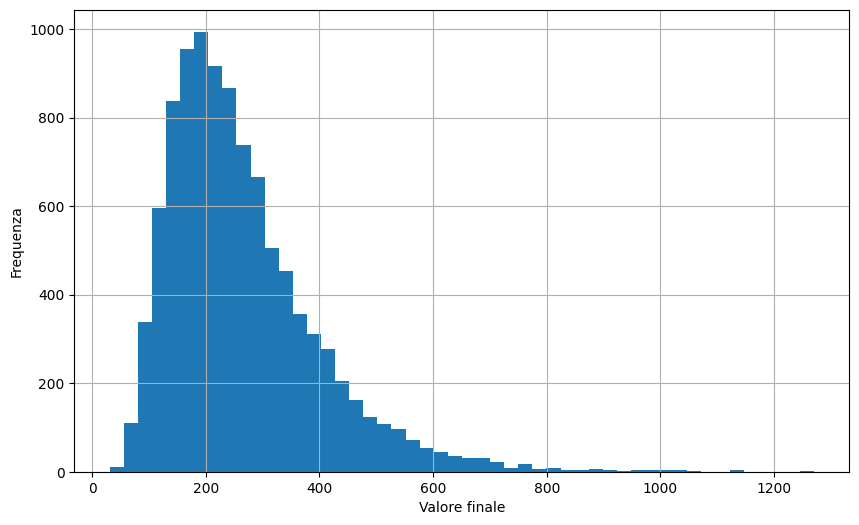

In [60]:
n = 10000 # numero di percorsi di investimento
T = 120 # numero di mesi in 10 anni
Port = np.zeros((T+1, n)) # inizializza una matrice grande T+1 x n con tutti gli elementi a zero
Port[0] = 100 # assegna 100 a tutti gli elementi della prima riga
for t in range(1, T+1): # da dalla riga 1 alla riga T+1
    Port[t] = Port[t-1]*(1+ (ret + std*np.random.randn(n))) # per ogni periodo temporale, viene calcolato il valore corrente che dipende da quello precedente moltiplicato per un fattore di crescita (dato dal ritorno atteso ret a cui viene aggiunta una componente causale che modella l'incertezza del mercato)

plt.figure(figsize = (10,6))
plt.hist(Port[-1], bins = 50)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()


__PER CAPIRE__: l'istogramma mostra la distribuzione dei valori finali del portafoglio ottenuti dalle 10000 simulazioni.

In [61]:
port_log = np.log(Port[-1])

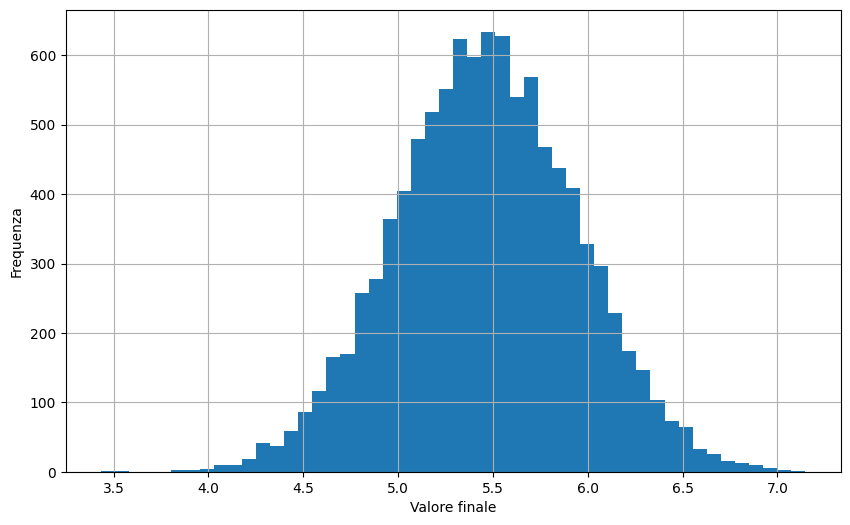

In [62]:
plt.figure(figsize = (10,6))
plt.hist(port_log, bins = 50)
plt.xlabel('Valore finale')
plt.ylabel('Frequenza')
plt.grid()
